# Customer Service Requests Analysis

In [ ]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns  

In [73]:
%matplotlib inline

In [74]:
import plotly.offline as py
import plotly.express as px
import plotly.io as pio

In [75]:
reqA = pd.read_csv ('a2.csv')
reqA.head(10)

C:\Users\saksh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning:

Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.



,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
5,32306554,12/31/2015 11:56:30 PM,01-01-16 1:50,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11215.0,260 21 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.660823,-73.992568,"(40.66082272389114, -73.99256786342693)"
6,32306559,12/31/2015 11:55:32 PM,01-01-16 1:53,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,10032.0,524 WEST 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.840848,-73.937375,"(40.840847591440415, -73.9373750864581)"
7,32307009,12/31/2015 11:54:05 PM,01-01-16 1:42,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10457.0,501 EAST 171 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837503,-73.902905,"(40.83750262540012, -73.90290517326568)"
8,32308581,12/31/2015 11:53:58 PM,01-01-16 8:27,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11415.0,83-44 LEFFERTS BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.704977,-73.832605,"(40.704977164399935, -73.8326047502584)"
9,32308391,12/31/2015 11:53:58 PM,01-01-16 1:17,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11219.0,1408 66 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.623793,-73.999539,"(40.623793065806524, -73.99953890121567)"


In [76]:
import datetime

In [86]:
df = pd.read_csv("a1.csv",low_memory=False, parse_dates=["Created Date", "Closed Date"])

In [87]:
df["Request_Closing_Time"] = df["Closed Date"] - df["Created Date"]

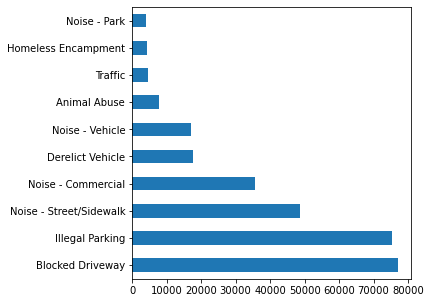

In [88]:
#Complaint type Breakdown with bar plot to figure out majority of complaint types and top 10 complaints
reqA['Complaint Type'].value_counts().head(10).plot(kind='barh',figsize=(5,5));

In [89]:
compalint=reqA.dropna(subset=["Complaint Type"])
complaint=reqA.groupby("Complaint Type")

sortedComp = complaint.size().sort_values(ascending = False).to_frame('count').reset_index()

sortedComp.head(10)

,Complaint Type,count
0,Blocked Driveway,77044
1,Illegal Parking,75361
2,Noise - Street/Sidewalk,48612
3,Noise - Commercial,35577
4,Derelict Vehicle,17718
5,Noise - Vehicle,17083
6,Animal Abuse,7778
7,Traffic,4498
8,Homeless Encampment,4416
9,Noise - Park,4042


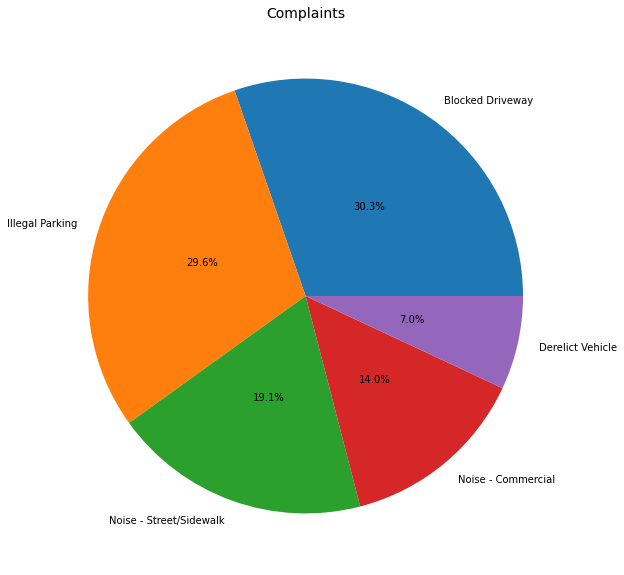

In [90]:
sortedComp = sortedComp.head()
plt.figure(figsize=(10,10))
plt.pie(sortedComp['count'],labels=sortedComp["Complaint Type"], autopct="%1.1f%%" ,  pctdistance=0.5)
plt.title("Complaints", fontsize=14);
plt.show()



In [91]:
#Group dataset by complaint type to display plot against city
groupedby_complainttype = df.groupby('Complaint Type')

In [92]:
grp_data = groupedby_complainttype.get_group('Blocked Driveway')

In [93]:
#To get nan values in the entire dataset
df.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

In [94]:
#deleting  blank values in City 
df['City'].dropna(inplace=True)

In [96]:
#count of null values in grouped city column data
grp_data['City'].isnull().sum()

283

In [99]:
#fixing NAN 
grp_data['City'].fillna('Unknown City', inplace =True)

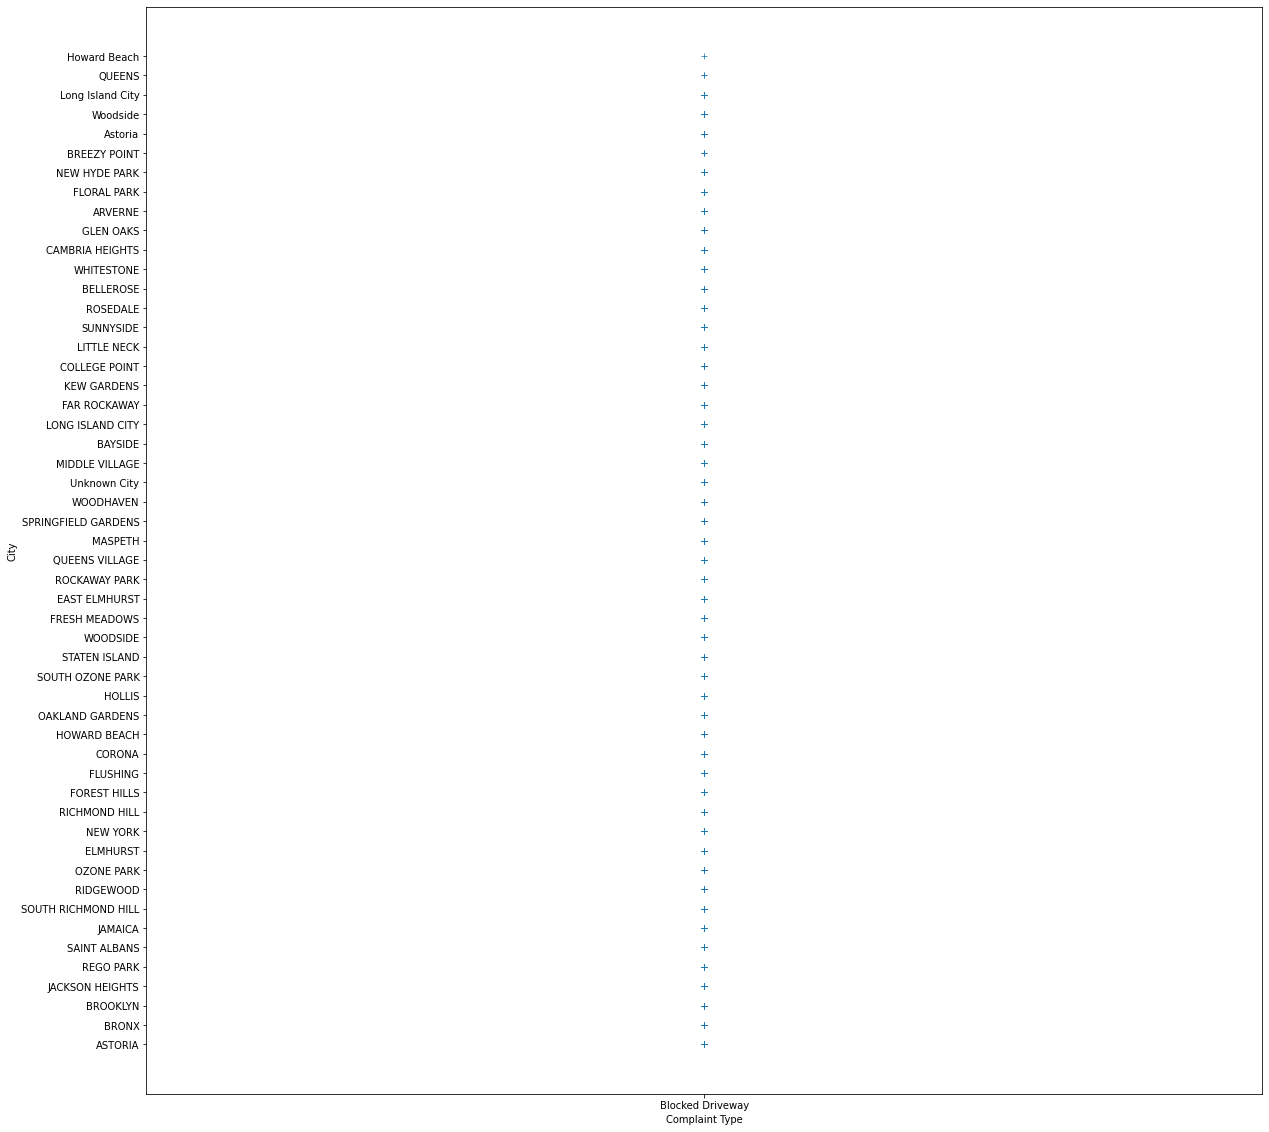

In [114]:

#Scatter plot - cities vs complaint of type 'Blocked Driveway'

plt.figure(figsize=(20, 20))
sns.scatterplot(data=reqA, x=grp_data['Complaint Type'], y=grp_data['City'] , marker="+", palette="deep")